# MovieLens Dataset

Este notebook carrega o dataset de avaliação de filmes do Movielens e faz as seguintes análises:
- descarta o timestamp
- descarta o gênero do filme
- reindexar com os índices sequenciais dos usuários e dos filmes
- salva o dataset com os novos índices e nomes dos filmes com os índices atualizados
- analisa a distribuição do número de avaliações por usuário
- analisa a distribuição do número de avaliações por filme
- cria e visualiza matriz de avaliação por usuário e filme
- calcula o histograma das notas de avaliação de 0.5 a 5.0
- visualiza esta matriz com os usuários mais ativos e filmes com maior número de avaliações
- visualiza esta matriz com os usuários menos ativos e filmes com menor número de avaliações

## Importação da bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import keras

np.set_printoptions(formatter={'float': '{: 0.1f}'.format})


Using TensorFlow backend.


## Leitura dos Dados - Movielens dataset

- [Movielens - Readme](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)
- Movielens - Small data set - 100.000 avaliações:[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015).


In [2]:
filename = 'ml-latest-small.zip'
origin = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
fpath = keras.utils.get_file(filename,origin=origin,extract=True)

In [3]:
ratings = pd.read_csv(os.path.dirname(fpath) + '/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Leitura dos títulos dos filmes

Just for display purposes, let's read in the movie names too.

In [4]:
movie_names = pd.read_csv(os.path.dirname(fpath) + '/ml-latest-small/movies.csv').set_index('movieId')['title'].to_dict()
print('movieId=31:',movie_names[31])
print('movieId=1029:',movie_names[1029])

movieId=31: Dangerous Minds (1995)
movieId=1029: Dumbo (1941)


### Análise dos dados

São ao todo 100.004 amostras, notas variam entre 0.5 e 5.0.

In [5]:
ratings = np.array(ratings)[:,:3] # remove a última coluna de timestamp
n_samples = ratings.shape[0]
print('ratings:',ratings.dtype,ratings.shape)
print('n_samples:',n_samples)
print('min (userId, movieId, rate):',ratings.min(axis=0))
print('max (userId, movieId, rate):',ratings.max(axis=0))
print('4 primeiras amostras:\n',ratings[:4,:])

ratings: float64 (100004, 3)
n_samples: 100004
min (userId, movieId, rate): [ 1.0  1.0  0.5]
max (userId, movieId, rate): [ 671.0  163949.0  5.0]
4 primeiras amostras:
 [[ 1.0  31.0  2.5]
 [ 1.0  1029.0  3.0]
 [ 1.0  1061.0  3.0]
 [ 1.0  1129.0  2.0]]


## Reindexação para normalizar os índices de usuários e de filmes

### Exercício para entender o funcionamento do np.unique para normalizar labels

In [6]:
# Exercício para entender o funcionamento do np.unique
a = np.array([205, 205, 300, 205, 205, 300, 4])
classes_id, a_norm = np.unique(a,return_inverse=True)
print('a:',a)
print('classes_id:',classes_id)
print('a_norm:',a_norm)
print('obtem indexação original:',classes_id[a_norm])
print('número de elementos distintos:', classes_id.size)

a: [205 205 300 205 205 300   4]
classes_id: [  4 205 300]
a_norm: [1 1 2 1 1 2 0]
obtem indexação original: [205 205 300 205 205 300   4]
número de elementos distintos: 3


### Normalizando userIds

Observa-se que os userIds são sequenciais. 
São ao todo 671 usuários, originalmente identificados de 1 a 671.
Após ordenação única começando do zero, são numerados de 0 a 670.

In [7]:
# verificando se os userIds estão ordenados
userId = ratings[:,0].astype(np.int) # userId é coluna 0
userId_classes, userId_norm = np.unique(userId,return_inverse=True)
n_users = userId_classes.size
print('userId (original)(min,max):',userId.min(),userId.max())
print('userId_norm (normalizado)(min,max):',userId_norm.min(),userId_norm.max())
print('n. de usuários:', n_users)

userId (original)(min,max): 1 671
userId_norm (normalizado)(min,max): 0 670
n. de usuários: 671


### ratings_norm com userIds normalizados de 0 a 670

In [8]:
ratings_norm = ratings[:,:3].copy()
ratings_norm[:,0]=userId_norm
print(ratings_norm[:5])

[[ 0.0  31.0  2.5]
 [ 0.0  1029.0  3.0]
 [ 0.0  1061.0  3.0]
 [ 0.0  1129.0  2.0]
 [ 0.0  1172.0  4.0]]


### Quantidade e títulos: 9066, reindexando para deiar os movieIds normalizados

In [9]:
movieId = ratings[:,1].astype(np.int) # movieId em ordem qualquer com múltipla ocorrência
movieId_classes,movieId_norm = np.unique(movieId,return_inverse=True)
n_movies = movieId_classes.size
print('movieId (original)(min,max):',movieId.min(),movieId.max())
print('movieId_norm (normalizado)(min,max):',movieId_norm.min(),movieId_norm.max())
print('movieId_classes[-15:]:',movieId_classes[-10:])
print('n. de filmes:',n_movies)

movieId (original)(min,max): 1 163949
movieId_norm (normalizado)(min,max): 0 9065
movieId_classes[-15:]: [161084 161155 161594 161830 161918 161944 162376 162542 162672 163949]
n. de filmes: 9066


### ratings_norm com userIds e movieIds normalizados

In [10]:
ratings_norm[:,1]=movieId_norm
print(ratings_norm[:5])

[[ 0.0  30.0  2.5]
 [ 0.0  833.0  3.0]
 [ 0.0  859.0  3.0]
 [ 0.0  906.0  2.0]
 [ 0.0  931.0  4.0]]


### Reindexando o dicionário de títulos com o movieId normalizado

In [11]:
movie_names_norm = np.empty((n_movies,),dtype=object) # movie_names_norm é criado como NumPy array
for i in np.arange(n_movies):
    a = movie_names[movieId_classes[i]]
    movie_names_norm[i] = a

### Verificando se a conversão dos movieId normalizada está correta

In [12]:
print(movie_names_norm[30])
print(movie_names[31])

print(movie_names_norm[833])
print(movie_names[1029])

Dangerous Minds (1995)
Dangerous Minds (1995)
Dumbo (1941)
Dumbo (1941)


## Salvando o movielens agora com userId e movieId sequenciais

In [14]:
os.makedirs('../data/',exist_ok=True)
np.savez_compressed('../data/movielens_norm.npz',
                    ratings=ratings_norm,
                    movie_names=movie_names_norm)

### Leitura para conferir

In [15]:
data = np.load('../data/movielens_norm.npz')
new_ratings = data['ratings']
new_movie_names = data['movie_names']

In [17]:
new_ratings[:5]

array([[ 0.0,  30.0,  2.5],
       [ 0.0,  833.0,  3.0],
       [ 0.0,  859.0,  3.0],
       [ 0.0,  906.0,  2.0],
       [ 0.0,  931.0,  4.0]])

In [18]:
for i in (new_ratings[:5,1]).astype(np.int):
    print(new_movie_names[i])

Dangerous Minds (1995)
Dumbo (1941)
Sleepers (1996)
Escape from New York (1981)
Cinema Paradiso (Nuovo cinema Paradiso) (1989)


## Análise dos dados

### Número de filmes avaliados por usuário

`np.bincount(v)` retorna um vetor histograma, contendo o número de ocorrências
de cada índice de `v`.

In [19]:
h_userId = np.bincount(new_ratings[:,0].astype(np.int))
n_users = h_userId.size
print(h_userId[:10])
print(h_userId.shape)

[ 20  76  51 204 100  44  88 116  45  46]
(671,)


ordena-se o histograma, para mostrar o número de avaliações por usuário. Utiliza-se a escala logarítmica para
poder ver melhor os usuários com poucas contribuições.

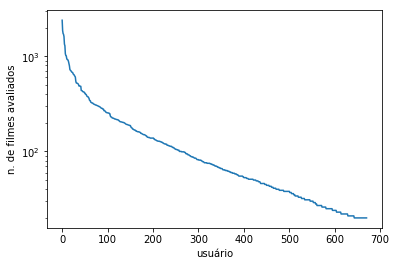

In [20]:
plt.semilogy(np.sort(h_userId)[::-1])
plt.ylabel('n. de filmes avaliados')
plt.xlabel('usuário');

### Número de avaliações por filme

Repete-se o mesmo procedimento em relação ao número de avaliações por filme.

(9066,)


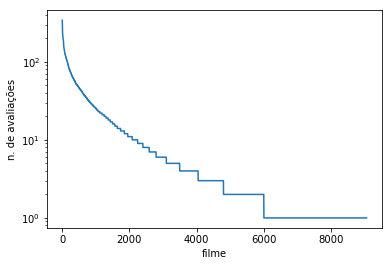

In [21]:
h_movieId = np.bincount(new_ratings[:,1].astype(np.int))
n_movies = h_movieId.size
print(h_movieId.shape)
plt.semilogy(np.sort(h_movieId)[::-1])
plt.ylabel('n. de avaliações')
plt.xlabel('filme');

### Dez filmes com maior número de avaliações

In [22]:
popular_movies = np.argsort(h_movieId)[:-10:-1]
for i in popular_movies:
    print(h_movieId[i],new_movie_names[i])

341 Forrest Gump (1994)
324 Pulp Fiction (1994)
311 Shawshank Redemption, The (1994)
304 Silence of the Lambs, The (1991)
291 Star Wars: Episode IV - A New Hope (1977)
274 Jurassic Park (1993)
259 Matrix, The (1999)
247 Toy Story (1995)
244 Schindler's List (1993)


## Matriz das avaliações

O sistema de recomendação pode ser visualizado por uma matriz onde as linhas sejam os
IDs dos usuários e as colunas sejam os IDs dos títulos dos filmes. Colocamos como -1
os elementos em que não existem avaliações. Esta matriz é bastante esparsa, pois existem
normalmente poucas avaliações feitas.

In [23]:
grid_ratings = -1. * np.ones((n_users,n_movies))
uId = (new_ratings[:,0]).astype(np.int)
mId = (new_ratings[:,1]).astype(np.int)
grid_ratings[uId,mId] = new_ratings[:,2] # Criação da matriz
print(grid_ratings.shape)

(671, 9066)


### Conferindo alguns valores

In [24]:
print(grid_ratings[0,30])
print(new_movie_names[30])

2.5
Dangerous Minds (1995)


### Visualização da matriz de ratings

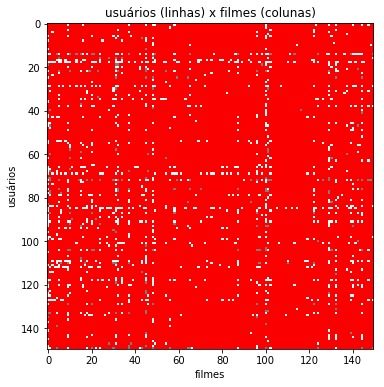

In [25]:
show_ratings = np.zeros((n_users,n_movies,3))
show_ratings[:,:,0] = np.where(grid_ratings == -1., 5, grid_ratings)
show_ratings[:,:,1] = np.where(grid_ratings == -1., 0., grid_ratings)
show_ratings[:,:,2] = np.where(grid_ratings == -1., 0., grid_ratings)


import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('usuários (linhas) x filmes (colunas)')
plt.imshow(show_ratings[:150,:150,:])
plt.xlabel('filmes')
plt.ylabel('usuários')
plt.show()

### Distribuição das avaliações: de 0.5 a 5.0

(array([ 1101.0,  3326.0,  1687.0,  7271.0,  4449.0,  20064.0,  10538.0,
         28750.0,  7723.0,  15095.0]),
 array([ 0.5,  0.9,  1.4,  1.9,  2.3,  2.8,  3.2,  3.6,  4.1,  4.5,  5.0]),
 <a list of 10 Patch objects>)

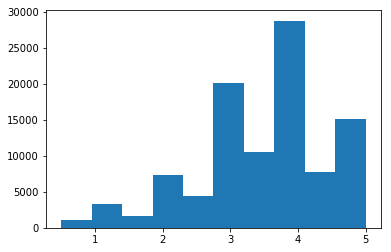

In [26]:
gt = grid_ratings.copy().reshape(-1)

plt.hist(gt[gt>=0])

### Ordenação por filmes mais populares e usuários mais ativos

Visualizando a matriz dos 150 filmes mais populares e 150 usuários mais ativos

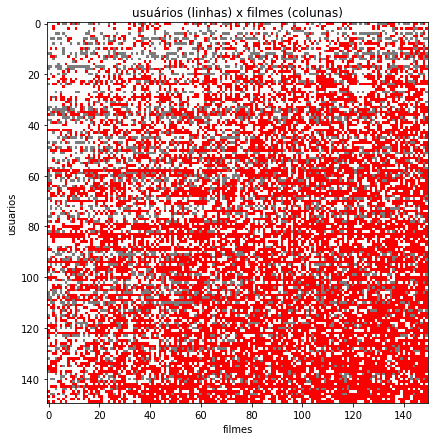

In [27]:
i_pop_movies = np.argsort(h_movieId)[::-1]
i_pop_users = np.argsort(h_userId)[::-1]
pop_show_ratings = show_ratings[np.ix_(i_pop_users,i_pop_movies)]
plt.figure(figsize=(7,7))
plt.title('usuários (linhas) x filmes (colunas)')
plt.imshow(pop_show_ratings[:150,:150,:])
plt.ylabel('usuarios')
plt.xlabel('filmes')
plt.show()

### Visualizando a matriz dos 150 filmes menos populares e 150 usuários menos ativos

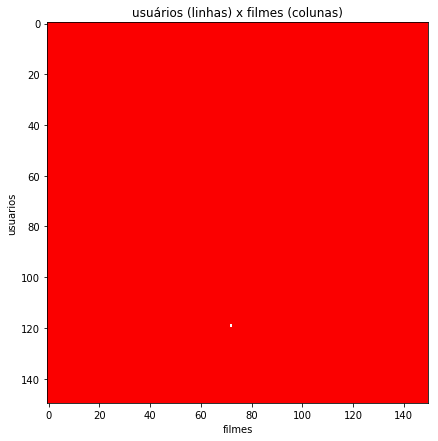

In [28]:
plt.figure(figsize=(7,7))
plt.title('usuários (linhas) x filmes (colunas)')
plt.imshow(pop_show_ratings[-150:,-150:]) # visualizando o canto inferior direito
plt.ylabel('usuarios')
plt.xlabel('filmes')
plt.show()

## Subset dos 10 filmes mais populares e usuários mais ativos

In [29]:
print('pop_users:',i_pop_users[:10])
print('pop_movies:',i_pop_movies[:10])
grid_ratings[np.ix_(i_pop_users,i_pop_movies)][:10,:10]

pop_users: [546 563 623  14  72 451 467 379 310  29]
pop_movies: [ 321  266  284  525  232  427 2062    0  472  522]


array([[ 2.0,  5.0,  5.0,  5.0, -1.0,  3.0,  3.5,  3.5,  5.0, -1.0],
       [ 3.0,  5.0, -1.0,  5.0,  2.0,  5.0,  3.0,  4.0,  4.0,  5.0],
       [ 3.0,  5.0, -1.0,  5.0,  5.0,  3.0,  2.0,  5.0, -1.0,  3.0],
       [ 1.0,  5.0,  2.0,  5.0,  5.0,  3.0,  5.0,  2.0,  4.0,  4.0],
       [ 5.0,  5.0,  5.0,  4.5,  4.5,  4.0,  4.5,  5.0,  5.0,  3.0],
       [ 4.0,  5.0,  5.0,  5.0,  4.0,  5.0,  2.0,  3.5,  4.0,  4.0],
       [ 3.0,  3.5,  3.5,  3.0,  3.5,  2.5,  3.0,  4.0, -1.0, -1.0],
       [ 5.0,  5.0,  4.0,  5.0,  4.0,  4.0,  5.0,  4.0, -1.0,  4.0],
       [ 5.0,  3.0,  4.5,  2.0,  4.0,  4.5,  4.0,  3.0,  5.0,  4.5],
       [ 5.0,  5.0,  5.0,  4.0,  4.0,  4.0,  3.0,  4.0,  5.0,  4.0]])

In [30]:
for i in i_pop_movies[:10]:
    print(new_movie_names[i])

Forrest Gump (1994)
Pulp Fiction (1994)
Shawshank Redemption, The (1994)
Silence of the Lambs, The (1991)
Star Wars: Episode IV - A New Hope (1977)
Jurassic Park (1993)
Matrix, The (1999)
Toy Story (1995)
Schindler's List (1993)
Terminator 2: Judgment Day (1991)


## Sugestões de exercícios

1. Calcule o porcentagem de avaliações em relação ao número total possível de avaliações.
2. Quantos filmes estão com apenas uma avaliação?
3. Quantos usuários fizeram apenas uma avaliação?

## Aprendizados com este notebook